# Introduction to neural network classification with Tensorflow

Classification problem: we try to classify something as one thing or another

Types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification




### Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1K examples
n_samples = 1000

# Create circles --toy dataset
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [5]:
# Check out features
X 

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
# Check the labels
y[:10]
# each sample has 1 label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y }) 
# X0: all items un 0 axis
# X1: all items in 1st axis
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


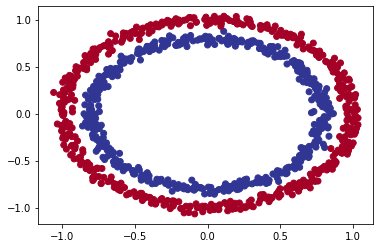

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[4], y[4]

(array([ 0.44220765, -0.89672343]), 0)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

* Build a neural network to classify blue and red dot



In [12]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


# 3. Fit the model
model_1.fit(X, y, epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 975us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 999us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 922us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 945us/step - loss: 0.6942 - accuracy: 0.4820


In [13]:
# Improve model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 927us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our problem is getting around 50% accuracy, it's performing as if it's guessing.

So let's step things up notch and add an extra layer

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
# we should fit on training data & evaluate on test data
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 946us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

Despite adding another layer, model_2 still doesn't perform well

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve model

1. Create a model -- add layers/increase number of hidden units
2. Compile a model -- choose diff optimization fn SGD --> Adam
3. Fit a model -- fit model for more epochs (train for longer)


In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model -- 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 932us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

Create a function to visualize prediction: `plot_decision_boundary()`

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  This function was insired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  ---unable to access 2. https://github.com/madewithml/basics/blob/master/notebook

  """
  # Define axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  #linspace --returns evenly numbers between 0 & 10
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  # c --convert matrix shape into list

  #Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  #if we have red, green and blue circles instead of red & blue:
  #check the len of first circle sample
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())

  


313/313 [==============================] - 0s 798us/step
doing binary classification


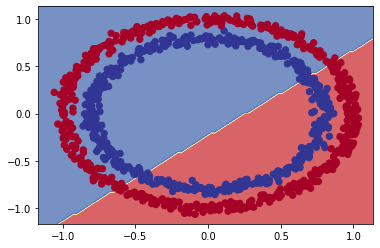

In [20]:
# Check the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

The model is actually trying to create a straight line instead of circle.

This is why its not accurate

Let's see if this model can be used for a regression problem

In [21]:
tf.random.set_seed(42)

# Create some regresssion data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 10

# Split regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100 )


Epoch 1/100


ValueError: ignored

So far the model is compiled for a binary classification problem ( we are using BinaryCrossetropy() )

we are now working on a regression problem. So lets change the model to suit current use case.


In [22]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])


# 2. Compile the model --with regression-specific loss fn
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 3ms/step


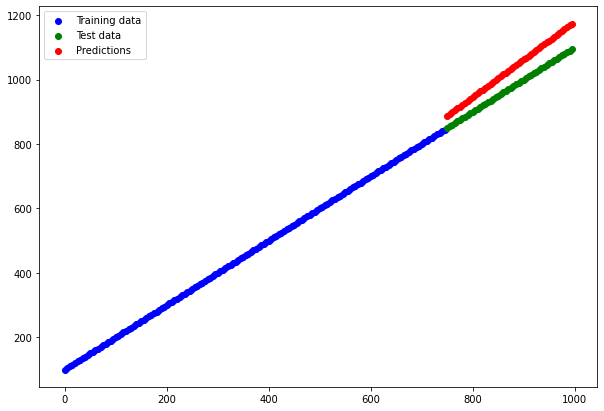

In [23]:
# Make prediction with the trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy", # or loss=tf.keras.losses.binary_crossentropy
                optimizer=tf.keras.optimizers.Adam(lr=0.001), #or optimizer="Adam"
                metrics=["accuracy"]
                )

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 938us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 934us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 953us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 984us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 951us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 993us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 915us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 1

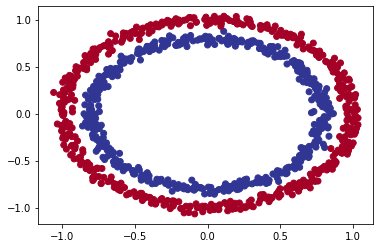

In [25]:
#Check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 716us/step
doing binary classification


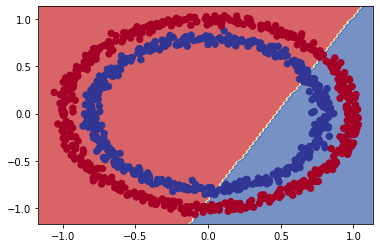

In [26]:
# Check model_4 decision boundary 
plot_decision_boundary(model=model_4, 
                       X=X,
                       y=y)

Build first neural network with a non-linear activation function

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# 3, Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 955us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 987us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 939us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 954us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 974us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 932us/step - loss: 3.7419 - accuracy: 0.42

model still not learning/improve!

In [28]:
#Increase layers and neurons

# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# 3, Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0492 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1798 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9532 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8652 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8147 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7857 - accuracy: 0.4150
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7699 - accuracy: 0.3780
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7598 - accuracy: 0.3770
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7528 - accuracy: 0.3430
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.3390
Epoch 11/

Model totally improved!

**Reminder** ❗
Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fit more data
* Fit for longer

Because each of these can be altered, they are hyperparameters

In [29]:
# Evaluate
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000


[0.006331042852252722, 1.0]

313/313 [==============================] - 0s 732us/step
doing binary classification


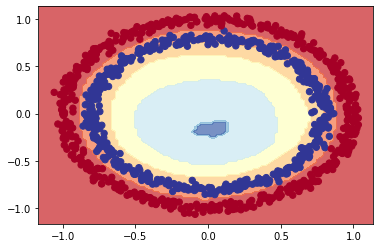

In [30]:
# visualize model_6 predictions
plot_decision_boundary(model_6,
                       X,
                       y)

This result is actually what we are looking for!

Lets try to add output activation function:Sigmoid

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])


# 2. Compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.6870
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.7710
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.8720
Epoch 11/

In [32]:
# 4. Evaluate model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 912us/step - loss: 0.0045 - accuracy: 1.0000


[0.004494064953178167, 1.0]

313/313 [==============================] - 0s 763us/step
doing binary classification


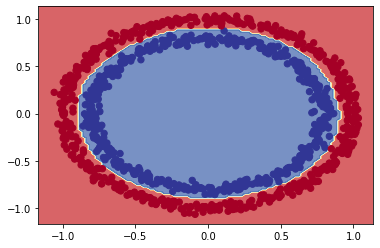

In [33]:
# 5. Visualize metrics
plot_decision_boundary(model_7, X, y)

The yellow line is precise! 🥰

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [34]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

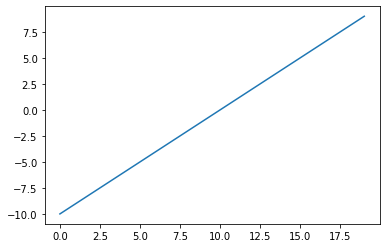

In [35]:
# Visualize toy tensor
plt.plot(A);


In [36]:
# lets start by replicating sigmoid = sigmoid(x) = 1 / (1 +exp(-x))
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

#Use sigmoid fn on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

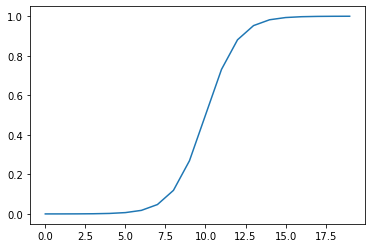

In [37]:
# Visualize/Plot
plt.plot(sigmoid(A));

In [38]:
# Lets recreate relu function
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor to our custom relu fn
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

relu makes -ve num to 0

In [39]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

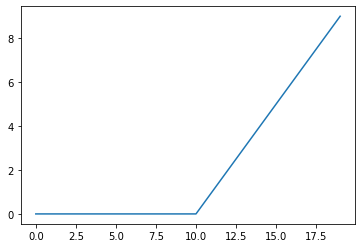

In [40]:
# Visualize/Plot
plt.plot(relu(A));

In [41]:
# Lets try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

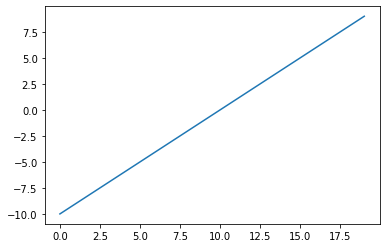

In [42]:
# Does linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [43]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [44]:
"""
 CONCLUSION -- INPUTS ARE UNMODIFIED FOR LINEAR ACTIVATION FN, thus resulting the model not really learning
            -- NON LINEAR ACTIVATION FUNCTION enables the model to deduce patterns

"""


'\n CONCLUSION -- INPUTS ARE UNMODIFIED FOR LINEAR ACTIVATION FN, thus resulting the model not really learning\n            -- NON LINEAR ACTIVATION FUNCTION enables the model to deduce patterns\n\n'

## Evaluate and improve classification model

So far we've been training & testing on the same dataset.

However, in machine learning this is basically a sin!

So let's create a training and test set

In [45]:
# Check how many examples we have
len(X)

1000

In [46]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [47]:
# Split into train and test set
# Actually there are 2 ways to do this: indexing and split using sklearn libray

#This one is indexing method
#Split into 80%training data & 20% test data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [48]:
# Recreate model to fit on training data and evaluate on test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer activation function
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy", #loss fn tells how wrong the patterns are
                optimizer=tf.keras.optimizers.Adam(lr=0.01), #optimizer tells our model on how it should improve/update patterns
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5325
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5850
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.6875
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8800
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.9625
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2253 - accuracy: 0.9787
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 0.9912
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9937
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.9950
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9937
Epoch 11/25
25/25 [===========

In [49]:
# 4. Evaluate model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 1.0000


[0.02329244464635849, 1.0]

313/313 [==============================] - 0s 753us/step
doing binary classification
313/313 [==============================] - 0s 741us/step
doing binary classification


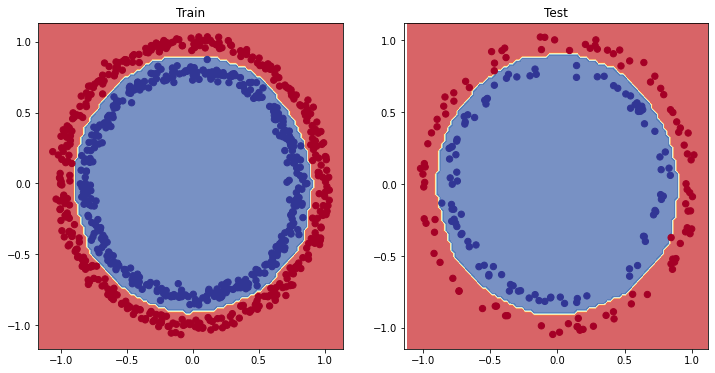

In [50]:
# 5. Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)

#Second subplot
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();


In [51]:
# check model_7
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               300       
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves



In [52]:
history.history

{'loss': [0.6885268688201904,
  0.6691046357154846,
  0.6097174286842346,
  0.46915557980537415,
  0.31316742300987244,
  0.2252800166606903,
  0.1654912382364273,
  0.1376604586839676,
  0.11279802024364471,
  0.09969329088926315,
  0.08930131793022156,
  0.0723429024219513,
  0.07107770442962646,
  0.05364328250288963,
  0.05221172794699669,
  0.04628093168139458,
  0.055919475853443146,
  0.09662611782550812,
  0.06044747680425644,
  0.05239735171198845,
  0.03518418222665787,
  0.02797326259315014,
  0.023395173251628876,
  0.021895669400691986,
  0.020803159102797508],
 'accuracy': [0.5325000286102295,
  0.5849999785423279,
  0.6875,
  0.8799999952316284,
  0.9624999761581421,
  0.9787499904632568,
  0.9912499785423279,
  0.9937499761581421,
  0.9950000047683716,
  0.9937499761581421,
  0.9962499737739563,
  0.9975000023841858,
  0.9950000047683716,
  0.9987499713897705,
  1.0,
  0.9987499713897705,
  0.9900000095367432,
  0.9737499952316284,
  0.9850000143051147,
  0.992500007152

`history` keep track of the accuracy in each epochs



In [53]:
# Convert history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.688527,0.53250
1,0.669105,0.58500
2,0.609717,0.68750
3,0.469156,0.88000
4,0.313167,0.96250
5,0.225280,0.97875
6,0.165491,0.99125
7,0.137660,0.99375
8,0.112798,0.99500
9,0.099693,0.99375


Text(0.5, 1.0, 'Model_8 loss curves')

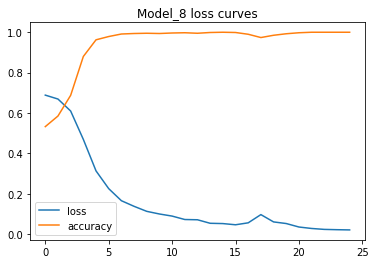

In [54]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")



🔑 **Note:** For many problems, the loss function going down

means the model is improving (the predictions it's making are getting closer to the grund truth labels.



## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training)

Use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add your *while* its training.

* Another model 
* A modified loss curved plot.


In [55]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer activation function

])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])


# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/20)))


#Fit the model (passinf lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

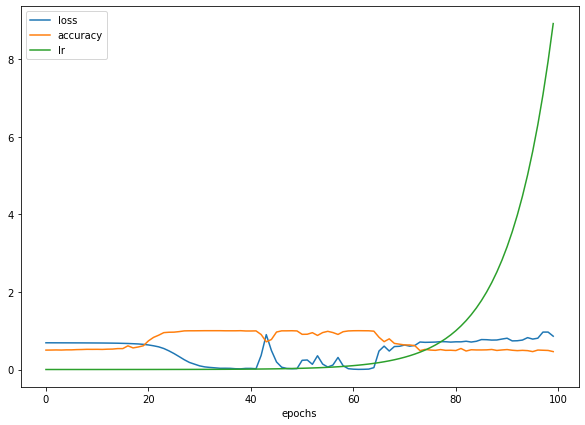

In [56]:
# Check out history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs Loss')

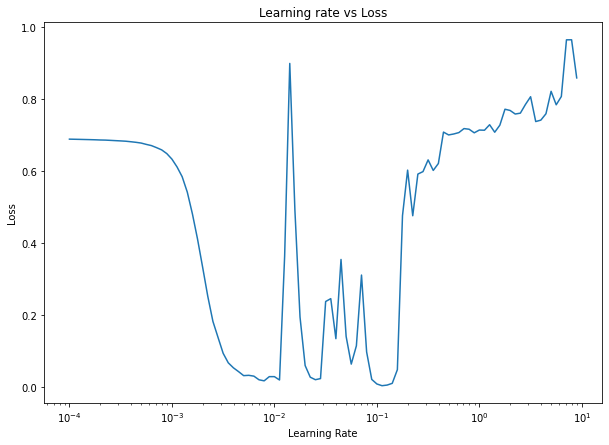

In [57]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [58]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

# Note the default built in lr in optimizer, eg Adam is ady good enough (0.001)
#if that doesn't, we have these values

(1, 0.1, 0.01, 0.001, 0.0001)

In [59]:
# Try using a higher learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)



Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5362
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.5950
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6950
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8662
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9775
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9837
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9975
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9937
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9912
Epoch 11/20
25/25 [===========

In [60]:
# Evaluate model 10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 1.0000


[0.012944218702614307, 1.0]

In [61]:
# Evaluate model 8 on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 1.0000


[0.02329244464635849, 1.0]

model_10 has less loss compared to model_8

313/313 [==============================] - 0s 769us/step
doing binary classification
313/313 [==============================] - 0s 798us/step
doing binary classification


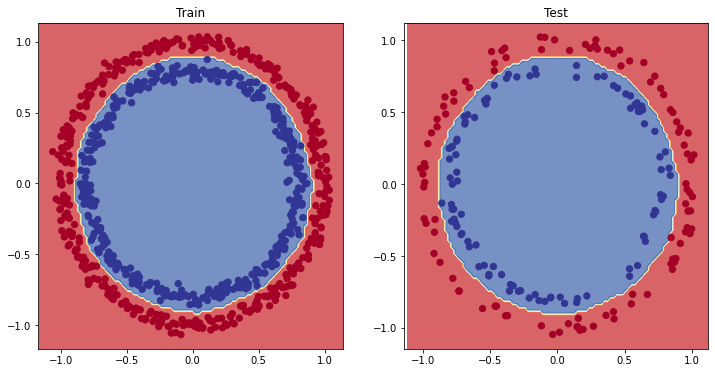

In [62]:
# Plot decision boundaries for training and test dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1-row, 2-column, 1st element
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1, 2, 2) # 1-row, 2-column, 2nd element
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification methods & metrics we should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report (from scikit-learn)

In [63]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000
Model loss on the test set: 0.012944218702614307
Model accuracy on the test set: 100.00%


How a bout Confusion Matrix?

In [64]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)


#Create confusion matrix
confusion_matrix(y_test, y_preds)



7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [65]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [66]:
y_preds[:10]

array([[9.8034513e-01],
       [9.8034513e-01],
       [9.8034513e-01],
       [9.8034513e-01],
       [4.8092343e-03],
       [3.6316503e-06],
       [9.8034513e-01],
       [3.4341897e-06],
       [9.8034513e-01],
       [7.6506607e-05]], dtype=float32)

y_test is in binary form while y_preds NOT (prediction probability form which a standard output from the sigmoid or softmax activation fn)

We'll have to convert

* Closer the value to 1, the model will think it as 1
* Closer to 0, it will think as 0

In [67]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [68]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

How about we prettify our confusion matrix?

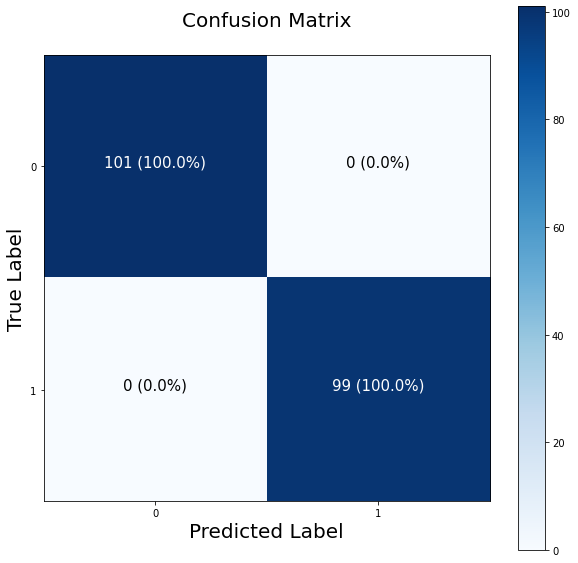

In [69]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize feature
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else: 
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
            size=15)
  
# the higher the value, the darker it gets (colour)


## Working with a larger example (multiclass classification)

Lets sat we have a fashion company and we want to predict a piec of clothig (shirt,shoe,jacker,etc)

When we have more than two classes as an option, it's known as **multi-class classification**.
* This means if we have 3 different classes, it's multi-class classification.
* It also means of we have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing

[Dataset Tensorflow Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist)



In [70]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()




4422102/4422102 [==============================] - 0s 0us/step


In [71]:
# Show the 1st training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")



Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [72]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

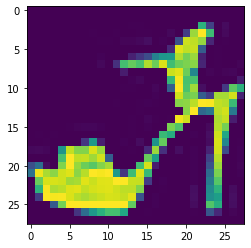

In [73]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[9]);



In [74]:
# Check out sample labels
train_labels[9]

5

In [75]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)


10

Text(0.5, 1.0, 'Sandal')

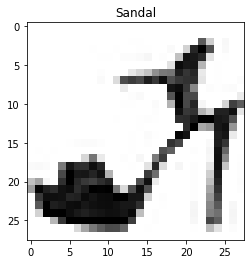

In [76]:
# Plot an example image and its label
index_of_choice = 9
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) #cmap = binary = grayscale
plt.title(class_names[train_labels[index_of_choice]])

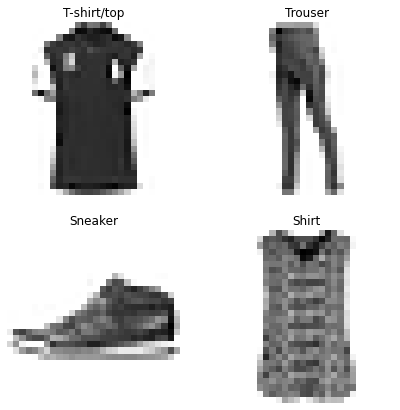

In [77]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things

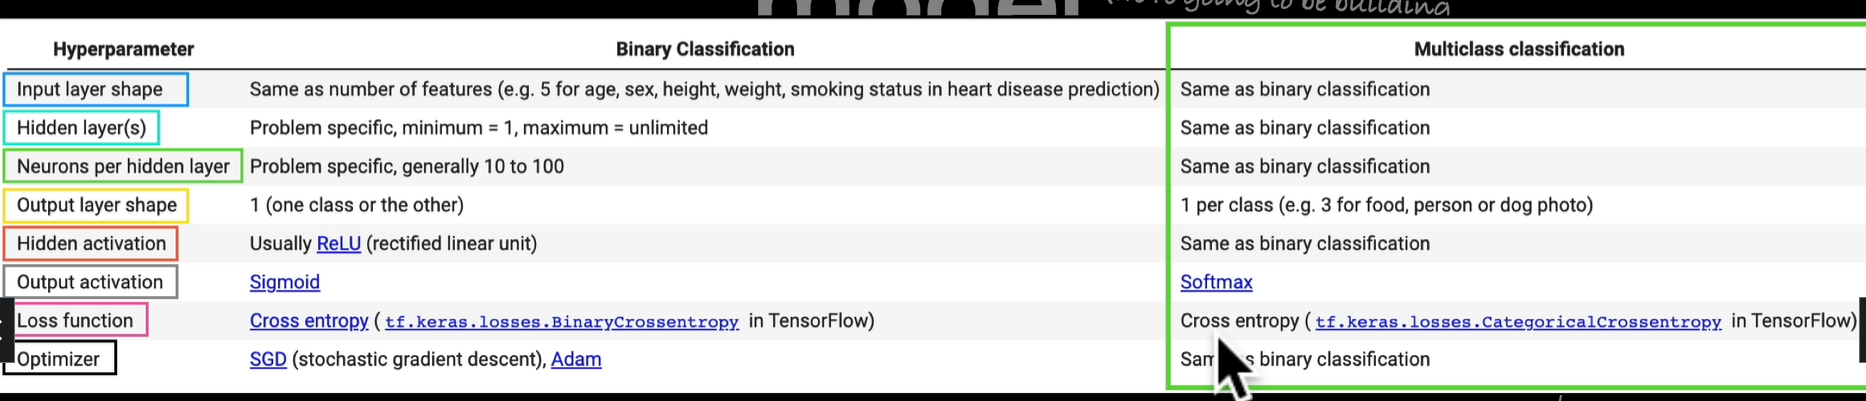

1. Input shape = 28 x 28 (the shape of 1 image)
2. Output shape = 10 (1 per class of clothing)
3. Loss function = tf.keras.losses.CategoricalCrossentropy()
4. Output layer activation fn = Softmax (NOT sigmoid)

In [78]:
# 1. Check input shape
train_data[0].shape

(28, 28)

In [79]:
# 2. Check output shape
len(class_names)

10

Check what flatten layer does

In [80]:
# our data needs to be flattened into one long vector(from 28*28 to None,784)
# Do this if we face a shape error
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [81]:
28 * 28

784

There are two types of activation function

* tf.keras.losses.CategoricalCrossentropy() -- need label to be provided in a one_hot representation

* tf.keras.losses.SparseCategoricalCrossentropy() -- provide labels as integers

Build model -- using SparseCategoricalCrossentropy loss function

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels) #test on unseen data
                                )


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

Build model -- using CategoricalCrossentropy loss function

In [83]:
# Check what happens if we one_hot the label
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [84]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10))) #test on unseen data
                                


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [85]:
# Check the model summary
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

we can do this by dividing all of the data by the max number

In [87]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255


#check min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [88]:
# Now our data is normalized, let's build a model to find patterns in it

# set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"), # 10, coz of 10 diff classes
                            
])


# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels)) 

                          

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

the accuracy had shot up from approx 33% to 80% just by normalizing the data

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

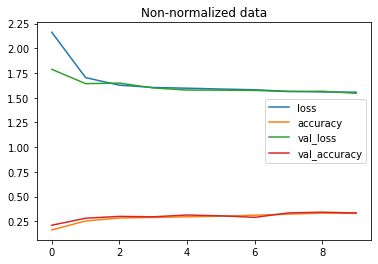

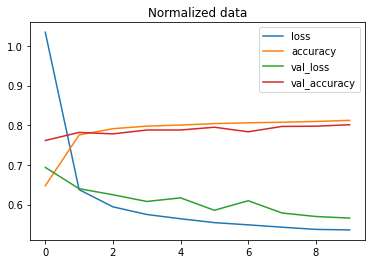

In [89]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑 **Note:** The same model with even *slightly* different data can produce *dramarically* different results. So when we're comparing models, it's important to make sure we're comparing them on the same criteria (e.g. same architecture but diff data and vice versa)

## Finding the ideal learning rate

In [90]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])


# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the ideal learning rate')

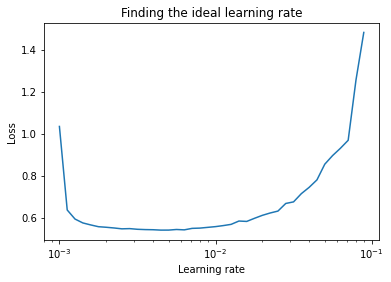

In [91]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")





Note: the best learning rate is at the lowest point where the loss is sharply decreased.



In [92]:
10**-3

0.001

Default learning rate parameters for Adam (we are using Adam) is at 0.001

This proved that the defualt lr is actually ideal/pretty damn good.

In [93]:
# Refit model with the ideal learning rate

# set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])


# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # default lr
                 metrics=["accuracy"]
                 )


# Fit model
history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## Evaluating multi-class classification model

To evaluate multi-class classification model, we could:

* Evaluate its performance using other classification metrics ( such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Imporve result (by training it for longer or changing the architecture)
* Save and axport it for use in an application


Top 2
* Confusion matrix

In [94]:
# Create Confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds) # y_true = y_test
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize feature
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels = classes
  else: 
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
              size=15)
    
  # the higher the value, the darker it gets (colour)


In [95]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [96]:
# Make some predictions with model
y_probs = model_14.predict(test_data_norm) # probs = prediction probabilities

#view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 777us/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, 2.0516393e-07,
        1.5329231e-02, 2.4532665e-13, 2.4142833e-02, 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657667e-01, 4.3866638e-08, 3.3405751e-03,
        1.3249396e-05, 1.4383215e-21, 8.2790139e-06, 7.3236619e-18,
        5.4811181e-08, 4.9224764e-14],
       [7.5031363e-05, 9.9053687e-01, 4.2528450e-07, 9.2231641e-03,
        1.3623103e-04, 1.8276370e-18, 2.6808191e-05, 4.8124370e-14,
        1.4521521e-06, 2.2211377e-11],
       [7.2189972e-02, 1.5495762e-06, 2.5566900e-01, 1.0363130e-02,
        4.3541361e-02, 1.1069341e-13, 6.1692995e-01, 6.7543104e-23,
        1.3049182e-03, 1.2140285e-09]], dtype=float32)


🔑 **Note:** Remember to make predictions on the same kind of data the model was trained on normalized data, we'll want to make predictions on normalized data

In [ ]:
y_probs[0], tf.argmax(y_probs[0])

(array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)


# View the first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds )


#Diagonal should be the highest number (confusion matrix)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

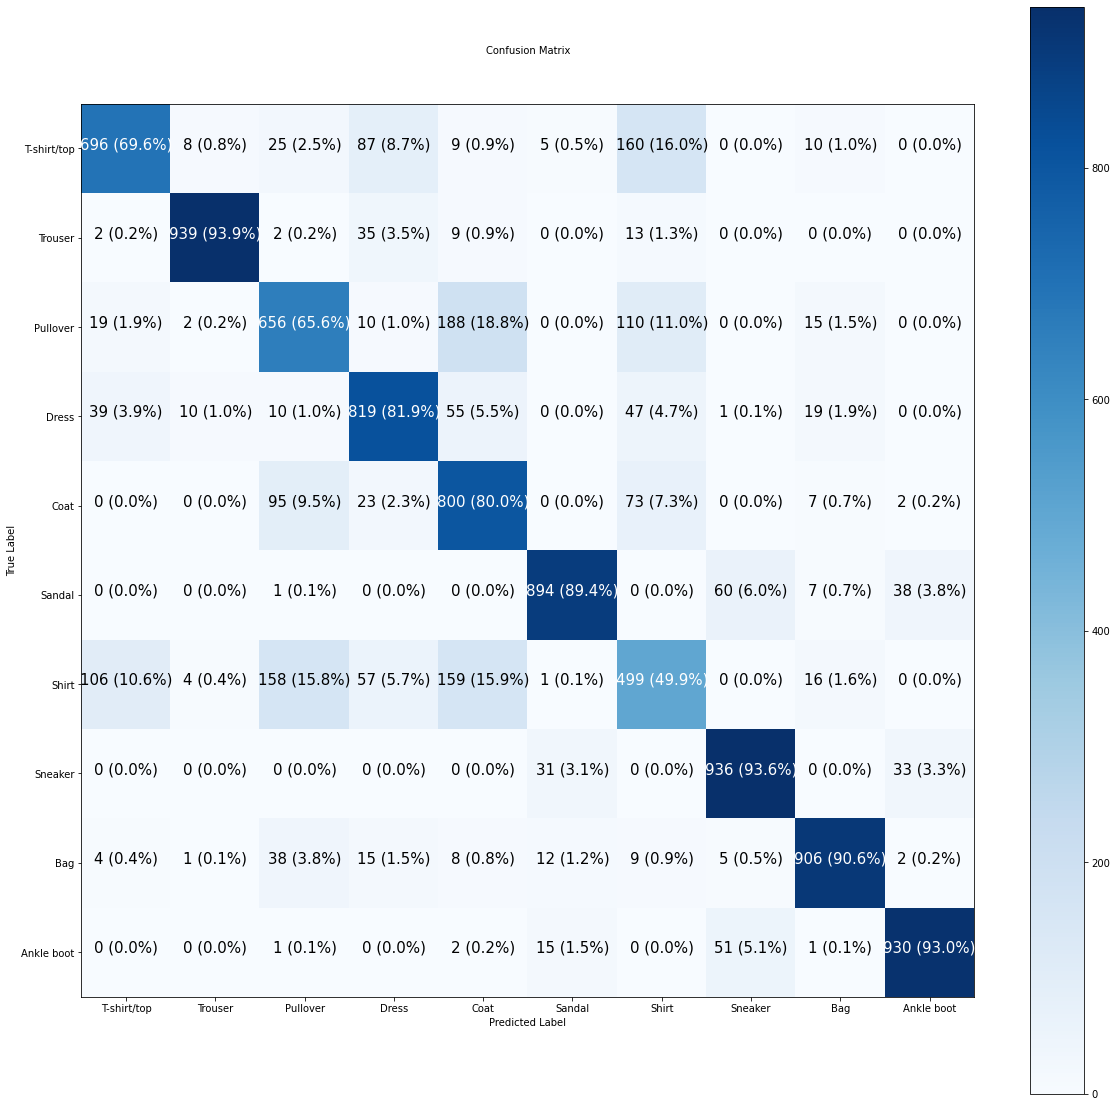

In [ ]:
# Make a prettier confuson matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20, 20),
                      text_size=10)

🔑 **Note:** When working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of models.


Create a function for:
* Plot a random image
* Make aprediction on said image
* Label the plot with the truth label & the predicted label

In [97]:
import random 

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plot it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))


  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the colour of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add x label information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on prediction (right or wrong)
  

1/1 [==============================] - 0s 13ms/step


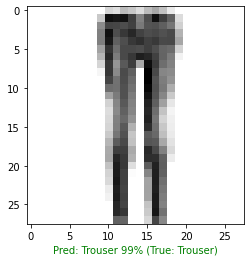

In [98]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, 
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [99]:
# Find the layers of our most recent model
model_14.layers

In [100]:
# Extract a particular layer
model_14.layers[1]

Weight matrix 
* 1 value per data point

In [101]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.71502626, -0.06077098, -0.9976306 , -1.0484313 ],
        [ 0.2773213 , -0.47155428, -0.5291645 ,  0.0232926 ],
        [ 0.7752429 ,  0.5402763 , -1.128857  , -0.7426155 ],
        ...,
        [-0.3945344 ,  0.476287  , -0.22641571,  0.25505948],
        [-0.40515783,  0.618101  ,  0.23928401, -0.5038762 ],
        [ 0.23884569,  0.11606903, -0.12131351,  0.04352415]],
       dtype=float32), (784, 4))

In [102]:
28*28

784

In [103]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Check out the bias vector
* 1 value per hidden unit


In [104]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.4485759e-02, -6.1474519e-04, -2.7230185e-01,  8.1124872e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix

The bias vector get initialized as zeeros (at least in the case of Tensorflow Dense layer).

The bias vector dictates how much the pattern within the corresponding weights matrix should influence the next layer.

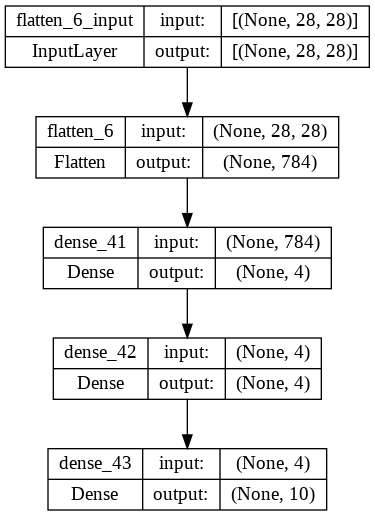

In [105]:
# Another wat to view our deep learning models
from tensorflow.keras.utils import plot_model

# See inputs and outputs of each layers
plot_model(model_14, show_shapes=True)